# Data Analysis

In [1]:
import s3fs; import xarray as xr; import numpy as np
import pandas as pd; import scipy
import matplotlib.pyplot as plt; import cartopy.crs as ccrs
import netCDF4 as nc; import datetime as dt
import ocetrac

import dask.array as da
import warnings; import expectexception
warnings.filterwarnings('ignore')
import intake; import pprint

import random
import nc_time_axis; import cftime; import datetime as dt

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")

#### North Pacific Ocean

In [10]:
lat_lim_less = 30.
lat_lim_great = 60.

lon_lim_less = 200.
lon_lim_great = 250.

### Ensemble Mean

In [4]:
ensemble_mean = xr.open_dataset('/glade/work/cassiacai/ensemble_mean.nc')

ensemble_mean_new = ensemble_mean.where((ensemble_mean.lat >= lat_lim_less) & (ensemble_mean.lat <= lat_lim_great) 
                        &(ensemble_mean.lon >= lon_lim_less) & (ensemble_mean.lon <= lon_lim_great),drop=True)

# ensemble_mean_new.SST.shape

In [5]:
ensemble_mean_new_nans = ensemble_mean_new.where(ensemble_mean_new != 0)

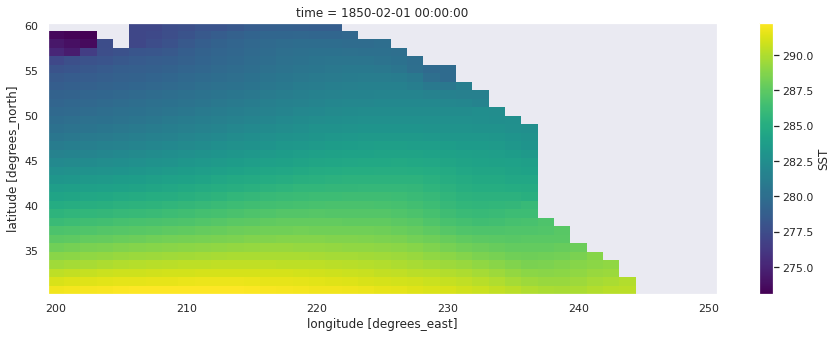

In [6]:
i = 0

plt.rcParams["figure.figsize"] = (15,5)
ensemble_mean_new_nans.SST[i,:,:].plot() # plt.pcolormesh(ensemble_mean_new_nans.SST[i,:,:]) # Alternative way to plot
plt.show()

In [80]:
ensemble_mean_SST = []; ensemble_max_SST = []; ensemble_min_SST = []; time_scale = []; time_month = []
for i in range(0,1980,12): 
    time_scale.append(i)
    time_month.append(ensemble_mean_new_nans.time[i])
    timed_SST = ensemble_mean_new_nans.SST[i,:,:]
    mean = np.nanmean(timed_SST); ensemble_mean_SST.append(mean)
    maximum = np.nanmax(timed_SST); ensemble_max_SST.append(maximum)
    minimum = np.nanmin(timed_SST); ensemble_min_SST.append(minimum)

In [82]:
ensemble_mean_SST_monthly = []; ensemble_max_SST_monthly = []; ensemble_min_SST_monthly = []; time_scale_monthly = []; time_month_monthly = []
for i in range(0,1980,1): #12
    time_scale_monthly.append(i)
    time_month_monthly.append(ensemble_mean_new_nans.time[i])
    timed_SST_monthly = ensemble_mean_new_nans.SST[i,:,:]
    mean = np.nanmean(timed_SST); ensemble_mean_SST_monthly.append(mean)
    maximum = np.nanmax(timed_SST); ensemble_max_SST_monthly.append(maximum)
    minimum = np.nanmin(timed_SST); ensemble_min_SST_monthly.append(minimum)

### SST Ensemble Members

In [3]:
SST_full = xr.open_dataset('SST_first10.nc')
first_10_members_SST = SST_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])

In [8]:
# plt.contourf(SST_full.SST[:,:,0,0])

In [11]:
first_10_members_SST_new = first_10_members_SST.where((first_10_members_SST.lat >= lat_lim_less) & (first_10_members_SST.lat <= lat_lim_great) 
                        &(first_10_members_SST.lon >= lon_lim_less) & (first_10_members_SST.lon <= lon_lim_great),drop=True)

In [12]:
first_10_members_SST_new_nans = first_10_members_SST_new.SST.where(first_10_members_SST_new.SST != 0)

In [13]:
first_10_members_SST_new = first_10_members_SST_new_nans

In [12]:
full_mean_SST = []; full_max_SST = []; full_min_SST = []; full_time_scale_SST = []

for j in range(0,10):
    mean_SST = []; max_SST = []; min_SST = []; time_scale_SST = []
    for i in range(0,1980,12): 
        time_scale_SST.append(i)
        timed_SST = first_10_members_SST_new[j, i, :, :]
        mean = np.nanmean(timed_SST); mean_SST.append(mean)
        maximum = np.nanmax(timed_SST); max_SST.append(maximum)
        minimum = np.nanmin(timed_SST); min_SST.append(minimum)
    full_mean_SST.append(mean_SST)
    full_max_SST.append(max_SST)
    full_min_SST.append(min_SST)
    full_time_scale_SST.append(time_scale_SST)

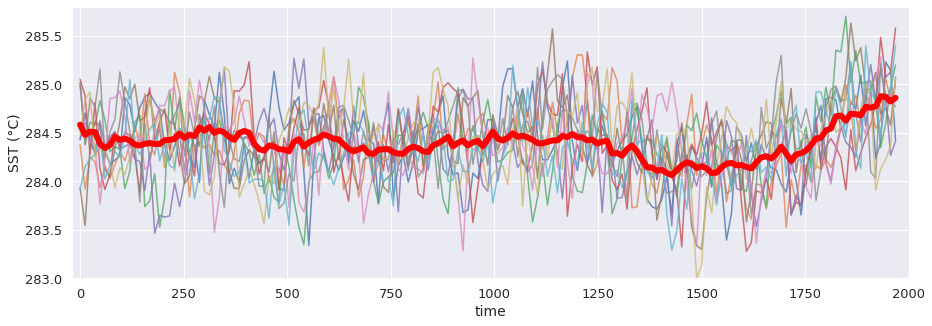

In [13]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(full_time_scale_SST[0], full_mean_SST[0],alpha=0.8)
plt.plot(full_time_scale_SST[1], full_mean_SST[1],alpha=0.8)
plt.plot(full_time_scale_SST[2], full_mean_SST[2],alpha=0.8)
plt.plot(full_time_scale_SST[3], full_mean_SST[3],alpha=0.8)
plt.plot(full_time_scale_SST[4], full_mean_SST[4],alpha=0.8)
plt.plot(full_time_scale_SST[5], full_mean_SST[5],alpha=0.8)
plt.plot(full_time_scale_SST[6], full_mean_SST[6],alpha=0.8)
plt.plot(full_time_scale_SST[7], full_mean_SST[7],alpha=0.8)
plt.plot(full_time_scale_SST[8], full_mean_SST[8],alpha=0.8)
plt.plot(full_time_scale_SST[9], full_mean_SST[9],alpha=0.8)

plt.plot(time_scale, ensemble_mean_SST,linewidth=6,color='red')

plt.xlim(-20,2000); plt.ylim(283,285.8)
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

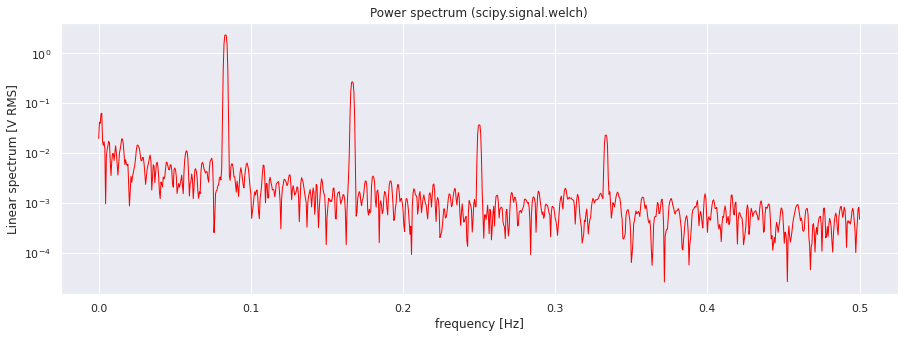

2.304511


In [78]:
from scipy import signal
''' ----------------------------------------------------------------------------
signal.welch
Welch's method is an improvement on the standard periodogram spectrum estimating 
method and on Bartlett's method, in that it reduces noise in the estimated power 
spectra in exchange for reducing the frequency resolution.

https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.signal.welch.html 

A periodogram is used to identify the dominant periods (or frequencies) of a time series. 
This can be a helpful tool for identifying the dominant cyclical behavior in a series, 
particularly when the cycles are not related to the commonly encountered monthly or 
quarterly seasonality.

---------------------------------------------------------------------------- '''
nseg = 1980

f, Pxx_spec = signal.welch(np.asarray(ensemble_mean_SST), 1.0, 'flattop', nperseg=nseg, noverlap=nseg-1, scaling='spectrum')
# f_0, Pxx_spec_0 = signal.welch(np.asarray(full_mean_SST[0]), 1, 'flattop', 165, scaling='spectrum')
# f_1, Pxx_spec_1 = signal.welch(np.asarray(full_mean_SST[1]), 1, 'flattop', 165, scaling='spectrum')
# f_2, Pxx_spec_2 = signal.welch(np.asarray(full_mean_SST[2]), 1, 'flattop', 165, scaling='spectrum')
# f_3, Pxx_spec_3 = signal.welch(np.asarray(full_mean_SST[3]), 1, 'flattop', 165, scaling='spectrum')

plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec),linewidth=1,color='red')
# plt.semilogy(f_0, np.sqrt(Pxx_spec_0))
# plt.semilogy(f_1, np.sqrt(Pxx_spec_1))
# plt.semilogy(f_2, np.sqrt(Pxx_spec_2))
# plt.semilogy(f_3, np.sqrt(Pxx_spec_3))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

print(np.sqrt(Pxx_spec.max())) # maximum at frequency = 4

165


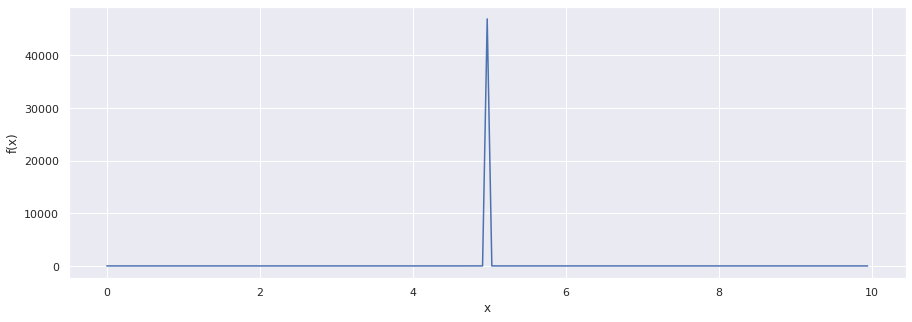

In [16]:
ensemble_mean_SST_hat = np.fft.fft(ensemble_mean_SST)
ensemble_mean_SST_hat = np.fft.fftshift(ensemble_mean_SST_hat)
print(len(ensemble_mean_SST_hat))

L = 5 

N_grid = 165 

grid = np.linspace(0, 2*L, N_grid+1)
grid = grid[0:N_grid]

plt.plot(grid, ensemble_mean_SST_hat)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

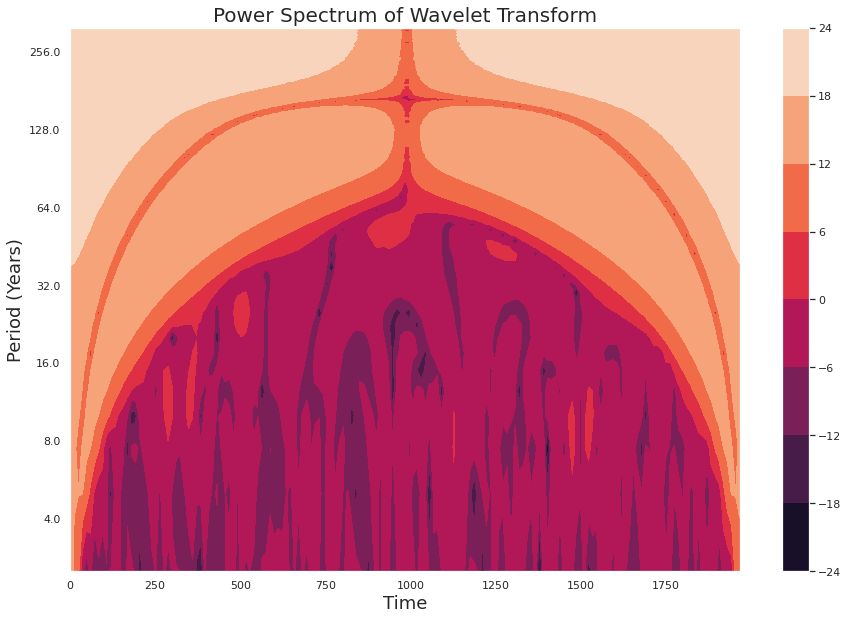

In [88]:
import pywt

scales = np.arange(1, 128)

[wc, freq] = pywt.cwt(full_mean_SST[5], scales, 'gaus3', 1)
# [wc, freq] = pywt.cwt(ensemble_mean_SST, scales, 'gaus3', 1)

power = wc**2
period = 1. / freq
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time_scale, np.log2(period), np.log2(power))

ax.set_title('Power Spectrum of Wavelet Transform', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
fig.colorbar(im, orientation="vertical")
plt.show()

### SSTA Ensemble Members

In [45]:
SSTA_full = xr.open_dataset('/glade/work/cassiacai/SSTA_full.nc')
first_10_members_SSTA = SSTA_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])

In [46]:
first_10_members_SSTA_new = first_10_members_SSTA.where((first_10_members_SSTA.lat >= lat_lim_less) & (first_10_members_SSTA.lat <= lat_lim_great) 
                        &(first_10_members_SSTA.lon >= lon_lim_less) & (first_10_members_SSTA.lon <= lon_lim_great),drop=True)

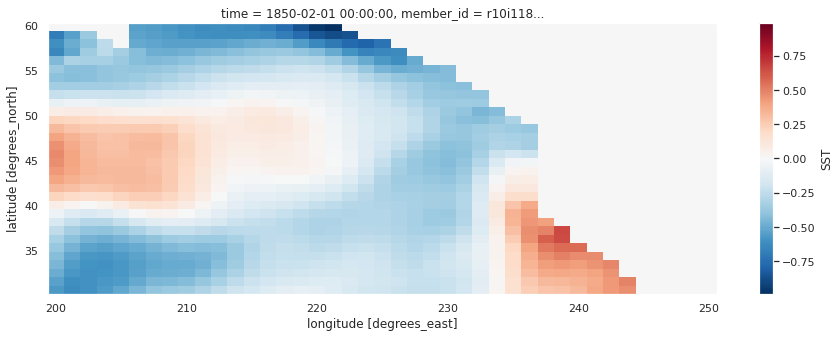

In [47]:
plt.rcParams["figure.figsize"] = (15,5)
first_10_members_SSTA_new.SST[0,0,:,:].plot()
plt.show()

In [48]:
full_mean_SSTA = []; full_max_SSTA = []; full_min_SSTA = []; full_time_scale_SSTA = []

for j in range(0,10):
    mean_SSTA = []; max_SSTA = []; min_SSTA = []; time_scale_SSTA = []
    for i in range(0,1980,12): 
        time_scale_SSTA.append(i)
        timed_SSTA = first_10_members_SSTA_new.SST[j, i, :, :]
        mean = np.nanmean(timed_SSTA); mean_SSTA.append(mean)
        maximum = np.nanmax(timed_SSTA); max_SSTA.append(maximum)
        minimum = np.nanmin(timed_SSTA); min_SSTA.append(minimum)
    full_mean_SSTA.append(mean_SSTA)
    full_max_SSTA.append(max_SSTA)
    full_min_SSTA.append(min_SSTA)
    full_time_scale_SSTA.append(time_scale_SSTA)

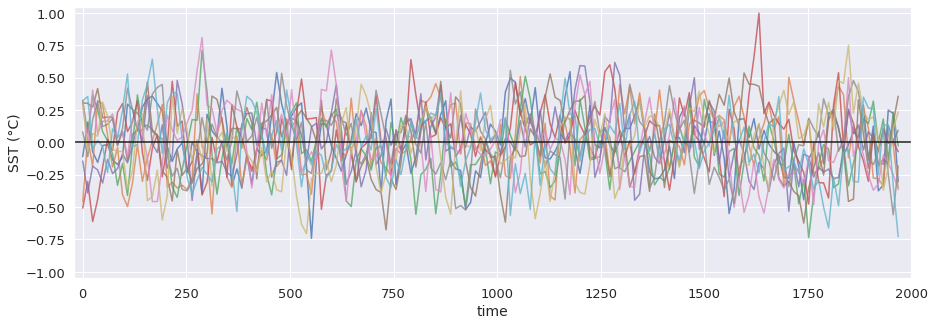

In [49]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(full_time_scale_SSTA[0], full_mean_SSTA[0],alpha=0.8)
plt.plot(full_time_scale_SSTA[1], full_mean_SSTA[1],alpha=0.8)
plt.plot(full_time_scale_SSTA[2], full_mean_SSTA[2],alpha=0.8)
plt.plot(full_time_scale_SSTA[3], full_mean_SSTA[3],alpha=0.8)
plt.plot(full_time_scale_SSTA[4], full_mean_SSTA[4],alpha=0.8)
plt.plot(full_time_scale_SSTA[5], full_mean_SSTA[5],alpha=0.8)
plt.plot(full_time_scale_SSTA[6], full_mean_SSTA[6],alpha=0.8)
plt.plot(full_time_scale_SSTA[7], full_mean_SSTA[7],alpha=0.8)
plt.plot(full_time_scale_SSTA[8], full_mean_SSTA[8],alpha=0.8)
plt.plot(full_time_scale_SSTA[9], full_mean_SSTA[9],alpha=0.8)

plt.xlim(-20,2000); plt.ylim(-1.05,1.05)
plt.axhline(y=0, color='k')
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

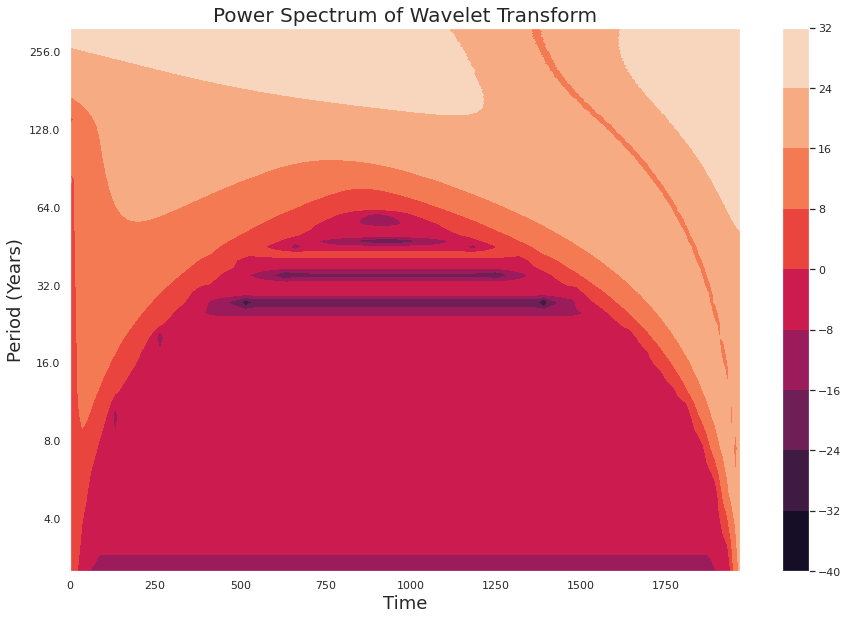

In [89]:
[wc, freq] = pywt.cwt(full_time_scale_SSTA[4], scales, 'gaus3', 1)
power = wc**2
period = 1. / freq
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time_scale, np.log2(period), np.log2(power))

ax.set_title('Power Spectrum of Wavelet Transform', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
fig.colorbar(im, orientation="vertical")
plt.show()

### Ocetrac Output

In [27]:
%%time

all_blob_files = []
all_combined_files = []
all_combined_NEP_files = [] # use this file. Can print(all_combined_NEP_files[0]) to see.
all_events_NEP = []

for i in range(0,10):
    blobs_ens_num = 'blobs_ens_{}_rad4.nc'.format(i)
    new_blob_file_open = xr.open_dataset(str(blobs_ens_num))
    all_blob_files.append(new_blob_file_open)
    
    combined = xr.combine_by_coords([first_10_members_SSTA.isel(member_id = i),new_blob_file_open])
    all_combined_files.append(combined)
    
    combined_NEP = combined.where((combined.lat >= lat_lim_less) & (combined.lat <= lat_lim_great)&(combined.lon >= lon_lim_less) & (combined.lon <= lon_lim_great),drop=True)
    all_combined_NEP_files.append(combined_NEP)
    
    event_NEP = combined_NEP.groupby(combined_NEP.labels)
    all_events_NEP.append(event_NEP)

CPU times: user 5.04 s, sys: 2.31 s, total: 7.36 s
Wall time: 14.6 s


In [29]:
%%time

full_dfs = []; full_xarrays = []

for i in range(len(all_events_NEP)):
    file = all_events_NEP[i]

    label_ls = []; time_begin_ls = []; time_end_ls = []; duration_ls = []; 
    intense_mean = []; intense_max = []; intense_min = [];intense_cumu = []
    coords_ls = []; cell_area_ls = []; lat_ls = []; lon_ls = []

    for l, ent in file:        
        label_ls.append(l)
        groupedby_by_time = ent.groupby(ent.time)
        time_begin = str(ent.time[0].values); time_begin_ls.append(time_begin)
        time_end = str(ent.time[-1].values); time_end_ls.append(time_end)
        
        duration = len(ent.groupby("time")); duration_ls.append(duration)

        temp_intense_mean = []; temp_intense_max = []; temp_intense_min = []; temp_intense_cumu = []
        temp_coords = []; temp_cell_area = []; temp_lat = []; temp_lon = []
        for n, gro in groupedby_by_time:
            lat = gro.lat.values
            lon = gro.lon.values
            time = gro.time.values
                        
            intensity_mean_val = gro['SST'].values.mean(); temp_intense_mean.append(intensity_mean_val)
            intensity_max_val = gro['SST'].values.max(); temp_intense_max.append(intensity_max_val)
            intensity_min_val = gro['SST'].values.min(); temp_intense_min.append(temp_intense_min)
            intensity_cumulative_val = gro['SST'].values.sum(); temp_intense_cumu.append(intensity_cumulative_val)

            coords = list(zip(lat, lon)); temp_coords.append(coords)
            temp_lat.append(lat); temp_lon.append(lon)
            y,x=zip(*coords)
            dlon = [np.cos(y[c]*np.pi/180)*(111.320*1) for c in np.arange(0, len(coords))]
            dlat = (110.574 *1) * np.ones(len(dlon))
            cell_area = [np.sum(dlon[c]*dlat[c]) for c in np.arange(0, len(coords))]; temp_cell_area.append(np.sum(cell_area))

        intense_mean.append(temp_intense_mean)
        intense_max.append(temp_intense_max)
        intense_min.append(temp_intense_min) 
        intense_cumu.append(temp_intense_cumu)
        coords_ls.append(temp_coords)
        cell_area_ls.append(temp_cell_area)
        lat_ls.append(temp_lat)
        lon_ls.append(temp_lon)
        
        begin_dates_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in time_begin_ls]
        
        end_dates_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in time_end_ls]
        
    my_df = pd.DataFrame(zip(label_ls, begin_dates_list, end_dates_list, duration_ls,
                            intense_mean, intense_max, intense_min, intense_cumu,
                            coords_ls, cell_area_ls, lat_ls, lon_ls), columns = ['label', 'time_begin', 'time_end', 'duration',
                                                              'intense_mean', 'intense_max', 'intense_min','intense_cumu',
                                                              'coords','cell_area','lat','lon'])
    my_xarray = my_df.to_xarray() 
    
    full_dfs.append(my_df)
    full_xarrays.append(my_xarray)

CPU times: user 33.1 s, sys: 161 ms, total: 33.2 s
Wall time: 34 s


### Data Analysis

In [30]:
%%time

month_length = 5.0 # filter for heatwaves that last 5 months or longer. 
# The Blob lasted for 17 months. Can also filter for heatwaves that last 17 months or longer.
# alternatively, we do not have to filter.

filt_full_xarrays = []

for i in range(len(full_xarrays)):
    using_array = full_xarrays[i]
    temp = using_array.where((using_array.duration >= month_length),drop=True)
    filt_full_xarrays.append(temp)

CPU times: user 7.07 s, sys: 105 ms, total: 7.18 s
Wall time: 7.35 s


In [31]:
%%time

### Selecting data example
one_event = filt_full_xarrays[0].isel(index = 2)
print(one_event.intense_cumu.values)
x_axis = np.arange(1, one_event.duration.values+1, 1)

[16.640045, 89.88422, 142.93213, 214.13257, 572.8706, 593.676]
CPU times: user 1.14 ms, sys: 5 µs, total: 1.15 ms
Wall time: 1.15 ms


In [32]:
%%time

full_char_df = []

maximums_all = []; means_all = []; cumulatives_all = []; max_cell_area_all = []; duration_all = []

for m in range(len(filt_full_xarrays)):
    xarray_using = filt_full_xarrays[m]
    
    maximums = []; means = []; cumulatives = []; max_cell_area = []; durations = []
    for i in range(len(xarray_using.intense_max)):
        maximums.append(np.nanmax(xarray_using.intense_max[i].item())); maximums_all.append(np.nanmax(xarray_using.intense_max[i].item()))
        means.append(np.nanmax(xarray_using.intense_mean[i].item())); means_all.append(np.nanmax(xarray_using.intense_mean[i].item()))
        cumulatives.append(np.nanmax(xarray_using.intense_cumu[i].item())); cumulatives_all.append(np.nanmax(xarray_using.intense_cumu[i].item()))
        max_cell_area.append(np.nanmax(xarray_using.cell_area[i].item())); max_cell_area_all.append(np.nanmax(xarray_using.cell_area[i].item()))
        durations.append(xarray_using.duration[i].item()); duration_all.append(xarray_using.duration[i].item())
        
    char_df = pd.DataFrame(zip(maximums, means, cumulatives, max_cell_area, durations), columns = ['intensity_max', 'intensity_mean', 'intensity_total', 'max_tot_cell_area','duration'])
    full_char_df.append(char_df)

CPU times: user 787 ms, sys: 63 µs, total: 787 ms
Wall time: 792 ms


In [33]:
%%time

max_all_q1 = np.quantile(maximums_all, 0.25)
max_all_q2 = np.quantile(maximums_all, 0.5)
max_all_q3 = np.quantile(maximums_all, 0.75)

mean_all_q1 = np.quantile(means_all, 0.25)
mean_all_q2 = np.quantile(means_all, 0.5)
mean_all_q3 = np.quantile(means_all, 0.75)

ic_all_q1 = np.quantile(cumulatives_all, 0.25)
ic_all_q2 = np.quantile(cumulatives_all, 0.5)
ic_all_q3 = np.quantile(cumulatives_all, 0.75)

mca_all_q1 = np.quantile(max_cell_area_all, 0.25)
mca_all_q2 = np.quantile(max_cell_area_all, 0.5)
mca_all_q3 = np.quantile(max_cell_area_all, 0.75)

dur_all_q1 = np.quantile(duration_all, 0.25)
dur_all_q2 = np.quantile(duration_all, 0.5)
dur_all_q3 = np.quantile(duration_all, 0.75)

CPU times: user 2.51 ms, sys: 648 µs, total: 3.16 ms
Wall time: 23.1 ms


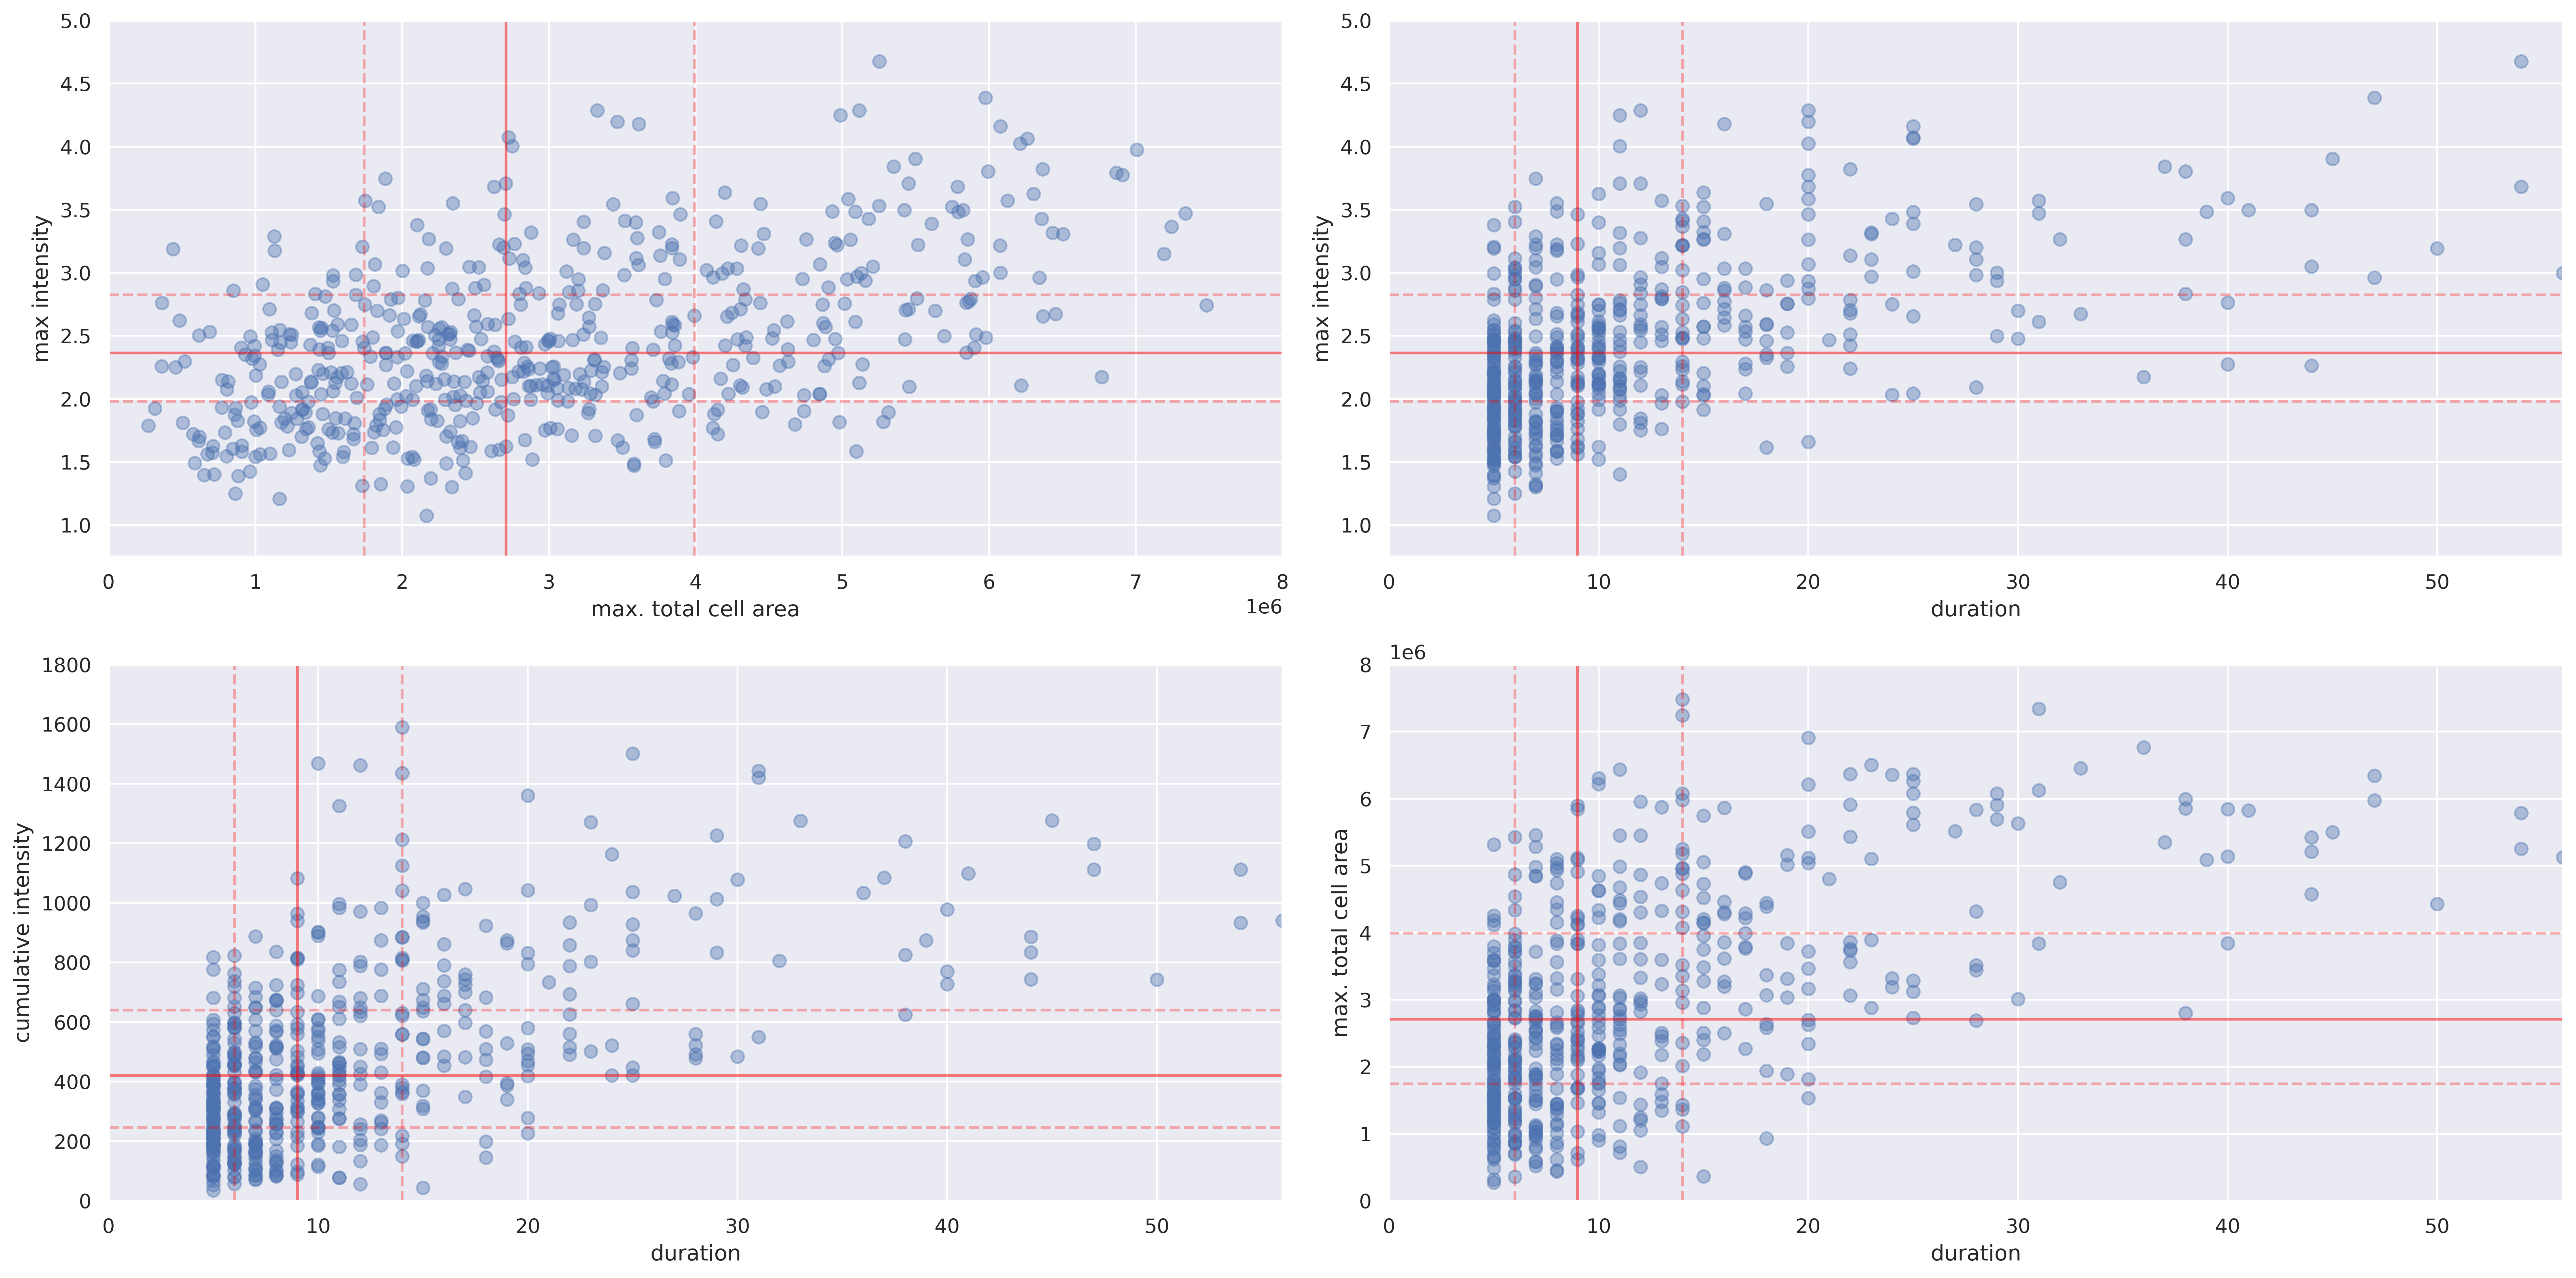

In [32]:
fig = plt.figure(figsize=(20, 10), dpi=400)

plt.subplot(2, 2, 1)
plt.axhline(y=max_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axhline(y=max_all_q2,alpha=0.5,c='red'); plt.axhline(y=max_all_q3,alpha=0.3,c='red',linestyle='dashed')
plt.axvline(x=mca_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axvline(x=mca_all_q2,alpha=0.5,c='red'); plt.axvline(x=mca_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(max_cell_area_all, maximums_all,alpha=0.4, s = 50)
plt.ylabel('max intensity'); plt.xlabel('max. total cell area')
plt.xlim(0,8e6); plt.ylim(0.75,5)

# --------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.axhline(y=max_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axhline(y=max_all_q2,alpha=0.5,c='red'); plt.axhline(y=max_all_q3,alpha=0.3,c='red',linestyle='dashed')
plt.axvline(x=dur_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axvline(x=dur_all_q2,alpha=0.5,c='red'); plt.axvline(x=dur_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(duration_all, maximums_all ,alpha=0.4, s = 50)
plt.ylabel('max intensity'); plt.xlabel('duration')
plt.xlim(0,dur_all_q3*4); plt.ylim(0.75,5)

# --------------------------------------------------------------
plt.subplot(2, 2, 3)
plt.axhline(y=ic_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axhline(y=ic_all_q2,alpha=0.5,c='red'); plt.axhline(y=ic_all_q3,alpha=0.3,c='red', linestyle='dashed')
plt.axvline(x=dur_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axvline(x=dur_all_q2,alpha=0.5,c='red'); plt.axvline(x=dur_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(duration_all, cumulatives_all ,alpha=0.4, s = 50)
plt.ylabel('cumulative intensity'); plt.xlabel('duration')
plt.xlim(0,dur_all_q3*4); plt.ylim(0,1800)
# --------------------------------------------------------------
plt.subplot(2, 2, 4)
plt.axhline(y=mca_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axhline(y=mca_all_q2,alpha=0.5,c='red'); plt.axhline(y=mca_all_q3,alpha=0.3,c='red', linestyle='dashed')
plt.axvline(x=dur_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axvline(x=dur_all_q2,alpha=0.5,c='red'); plt.axvline(x=dur_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(duration_all, max_cell_area_all ,alpha=0.4, s = 50)
plt.ylabel('max. total cell area'); plt.xlabel('duration')
plt.ylim(0,8e6); plt.xlim(0,dur_all_q3*4);

plt.tight_layout()
plt.show()

#### IDF curves
##### Following Power laws, Pareto distributions and Zipf's law by M.E.J. Newman (2006)
$$ \ln(p(x)) = -\alpha \ln(x) + c $$ 
$$ p(x) = Cx^{-\alpha} = e^{c}x^{-\alpha} $$  

Cumulative distribution:
$$ P(x) = \frac{C}{\alpha - 1} x^{-(\alpha - 1)} $$

The cumulative distribution also follows a power law, but with a different exponent $ \alpha - 1 $. There is also no need to bin data to calculate P(x).

$$ \alpha = 1 + n [\sum_{i=1}^{n} \ln(\frac{x_i}{x_{min}})]^{-1} $$ 

$$ \sigma = \sqrt{n} [\sum_{i=1}^{n} \ln(\frac{x_i}{x_{min}})]^{-1} = \frac{\alpha - 1}{\sqrt{n}}$$ 

In [65]:
# stack overflow

In [66]:
from scipy.optimize import curve_fit

In [67]:
# calculate alpha, sigma, and cumulative probability
def calc_alpha(x_min, n):                               # check this. This isn't giving me an alpha that I expect! # reread paper?
    temp = 1/(np.sum(np.log((np.arange(1,n+1))/x_min)))
    alpha = 1 + (n*temp)
    return alpha

def calc_sigma(alpha, n):                               # check this. 
    sigma = (alpha - 1) / np.sqrt(n)
    return sigma

def power_law(x, a, b):
    return a * np.power(x, -b)

def cumulative_probability(C, alpha, xdata):
    exp_use = alpha - 1
    cprob = (C /exp_use)*(xdata**(-exp_use))
    return cprob

def NormalizeData(data): # Normalizing # might need to use this.
    return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))

In [68]:
x_min = 5 # kind of arbitrary
n = 74 # int(np.nanmax(duration_all))

alpha_val = calc_alpha(x_min,n)
sigma_val = calc_sigma(alpha_val, n)

print(alpha_val, '± ', sigma_val)

1.5759897494076673 ±  0.0669574483092855


In [69]:
# %%time
# data_tuples = list(zip(duration_all,maximums_all, max_cell_area_all, cumulatives_all))
# data_df = pd.DataFrame(data_tuples, columns=['duration','intensity_max','max_cell_area_all','cumulative_intensity'])
# sorted_df = data_df.sort_values(by = 'duration')

In [70]:
# sorted_df.to_pickle('data_df.pkl')

In [71]:
data_df_output = pd.read_pickle("data_df.pkl")

In [72]:
print(data_df_output)

     duration  intensity_max  max_cell_area_all  cumulative_intensity
90        5.0       1.613953       1.793141e+06            210.917572
117       5.0       2.217316       2.791763e+06            507.144867
286       5.0       1.578705       1.601768e+06            187.267883
202       5.0       2.789673       1.923073e+06            404.642853
383       5.0       2.590485       1.559988e+06            281.764496
..        ...            ...                ...                   ...
409      56.0       2.997955       5.127628e+06            940.786072
302      60.0       3.793335       6.867317e+06           1553.285889
209      61.0       3.975037       7.005625e+06           1416.077637
337      62.0       3.148468       7.190689e+06           1485.910889
498      74.0       3.237183       4.948927e+06            696.125732

[537 rows x 4 columns]


In [ ]:
f,pxx =welch(filtered.values.flatten(),5)

In [100]:
grouped_df_mean = data_df_output.groupby('duration').mean()
grouped_df_std = data_df_output.groupby('duration').std()

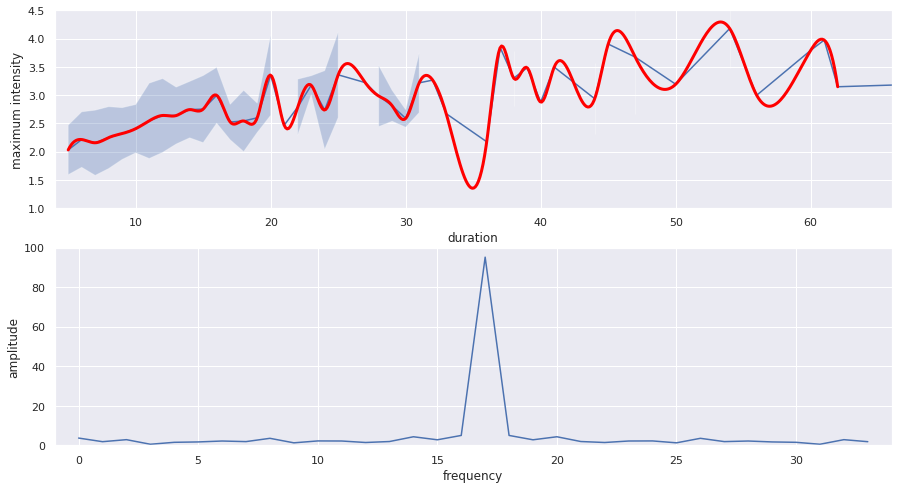

In [191]:
# Make a smooth plot
from scipy.interpolate import make_interp_spline

x = grouped_df_mean.intensity_max.index[:43]
y = grouped_df_mean.intensity_max.values[:43]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(),500)
Y_ = X_Y_Spline(X_)

plt.rcParams["figure.figsize"] = (15,8)

plt.subplot(2, 1, 1)
plt.xlim(4,66); plt.ylim(1,4.5)
plt.plot(grouped_df_mean.intensity_max.index, grouped_df_mean.intensity_max.values)
plt.fill_between(grouped_df_mean.intensity_max.index, 
                 grouped_df_mean.intensity_max.values-grouped_df_std.intensity_max.values, 
                 grouped_df_mean.intensity_max.values+grouped_df_std.intensity_max.values, alpha=0.3)

plt.plot(X_, Y_, c='red', linewidth=3)
plt.xlabel('duration'); plt.ylabel('maximum intensity')

plt.subplot(2, 1, 2)
d = np.asarray(grouped_df_mean.intensity_max[:43])
f_fft = np.fft.fft(d)
f_fft_shifted = np.fft.fftshift(f_fft)

df = pd.DataFrame(list(zip(X_, Y_)),columns =['X_', 'Y_'])
# e = np.asarray(df)
# f_fft_e = np.fft.fft(e)
# f_fft_shifted_e = np.fft.fftshift(f_fft_e)

plt.plot(abs(f_fft_shifted))
plt.xlabel('frequency'); plt.ylabel('amplitude')
# plt.plot(abs(f_fft_shifted_e.real))
plt.xlim(-1,34); plt.ylim(0,100)

plt.show()

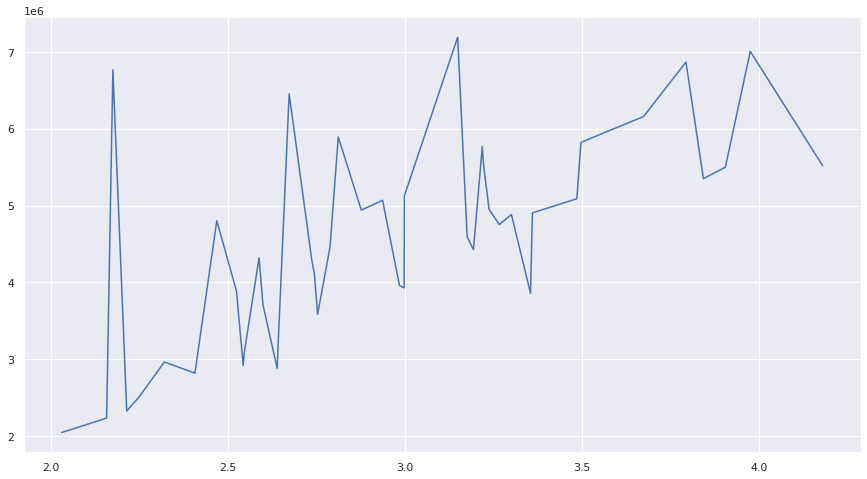

In [205]:
sorted_grouped_df_mean = grouped_df_mean.sort_values(by=['intensity_max'])
plt.plot(sorted_grouped_df_mean.intensity_max, sorted_grouped_df_mean.max_cell_area_all)

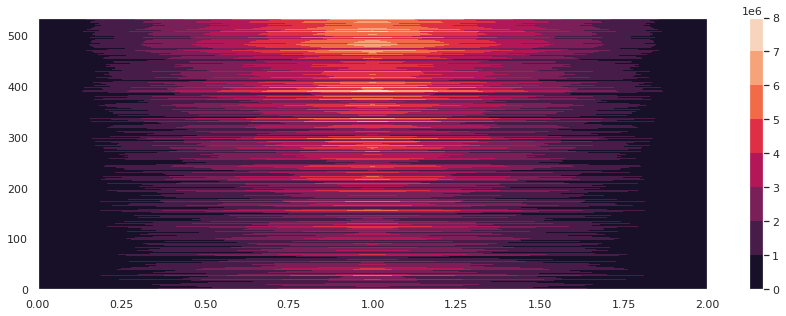

In [26]:
plt.rcParams["figure.figsize"] = (15,5)

plt.contourf(data_df_output[['duration','max_cell_area_all','intensity_max']])
plt.colorbar()
plt.show()

In [37]:
asarray = np.asarray(data_df_output[['duration','max_cell_area_all','intensity_max']])
asarray.shape

f_fft_2d = np.fft.fft2(asarray)
f_fft_shifted_2d = np.fft.fftshift(f_fft_2d)
f_fft_shifted_2d.shape

(537, 3)

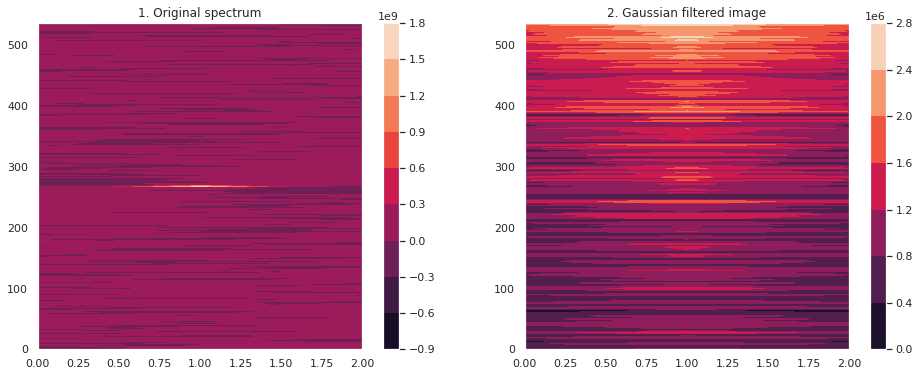

In [47]:
from scipy import ndimage

plt.rcParams["figure.figsize"] = (16,6)
plt.subplot(1, 2, 1); plt.title('1. Original spectrum')
plt.contourf(f_fft_shifted_2d); plt.colorbar()

plt.subplot(1, 2, 2); plt.title('2. Gaussian filtered image')
im_blur = ndimage.gaussian_filter(asarray, 1)
plt.contourf(im_blur); plt.colorbar() # alternative is im.show()

plt.show()

In [29]:
%%time
grouped_df_mean = data_df_output.groupby('duration').mean()
grouped_df_std = data_df_output.groupby('duration').std()

CPU times: user 2.36 ms, sys: 37 µs, total: 2.4 ms
Wall time: 2.41 ms


In [30]:
freq_count_dur = data_df_output['duration'].value_counts(normalize=True)
freq_count_dur_sorted = freq_count_dur.sort_index()

freq_count_dur_notnormed = data_df_output['duration'].value_counts()
freq_count_dur_not_normed_sorted = freq_count_dur_notnormed.sort_index()

In [31]:
# attempt 1
index_list = freq_count_dur_sorted.index + 1
freq_list = freq_count_dur_sorted.values

popt, pcov = curve_fit(power_law, index_list, freq_list)
print(popt) 

[7.07352835 2.04239982]


In [32]:
# taken from Stack Overflow 
# https://stackoverflow.com/questions/10181151/trying-to-get-reasonable-values-from-scipy-powerlaw-fit
from pylab import *; from scipy import *; from scipy import optimize

xdata=index_list
ydata=freq_list

logx = log10(xdata)
logy = log10(ydata)

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit, args=(logx, logy), full_output=1)

pfinal = out[0]
covar = out[1]

index = pfinal[1]
amp = 10.0**pfinal[0]

print ('amp:',amp, 'index', index)

powerlaw = lambda x, amp, index: amp * (x**index)

amp: 5.772811461416442 index -2.023540280728027


I also plugged into Excel:
$$ y = 3.7367x^{-1.919} $$
$$ R^{2} = 0.9795 $$
C = 3.7367; alpha = 1.919

In [34]:
nprange = np.arange(np.nanmin(index_list),np.nanmax(index_list))

In [35]:
# from Excel:
C = 3.7367; alpha = 1.919

xdata = nprange
cprob = cumulative_probability(C, alpha, xdata)

In [36]:
# from Stack Overflow code: 
C_SO = amp; alpha_SO = abs(index)

# xdata = index_list
xdata = nprange
cprob_SO = cumulative_probability(C_SO, alpha_SO, xdata)

In [37]:
# from my definition # Does not look good
alpha_neweq = 1.57; C_neweq = 1 # recalculate C later

xdata = index_list
cprob_neweq = cumulative_probability(C_neweq, alpha_neweq, xdata)

In [38]:
y_neweq = C_neweq*nprange**(-alpha_neweq)
y_SO = amp*nprange**(-abs(index))
y_excel = C*nprange**(-alpha)

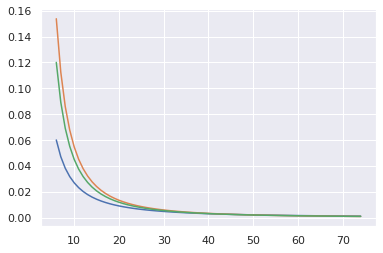

In [39]:
plt.plot(nprange,y_neweq)
plt.plot(nprange,y_SO)
plt.plot(nprange,y_excel)

In [40]:
%matplotlib inline

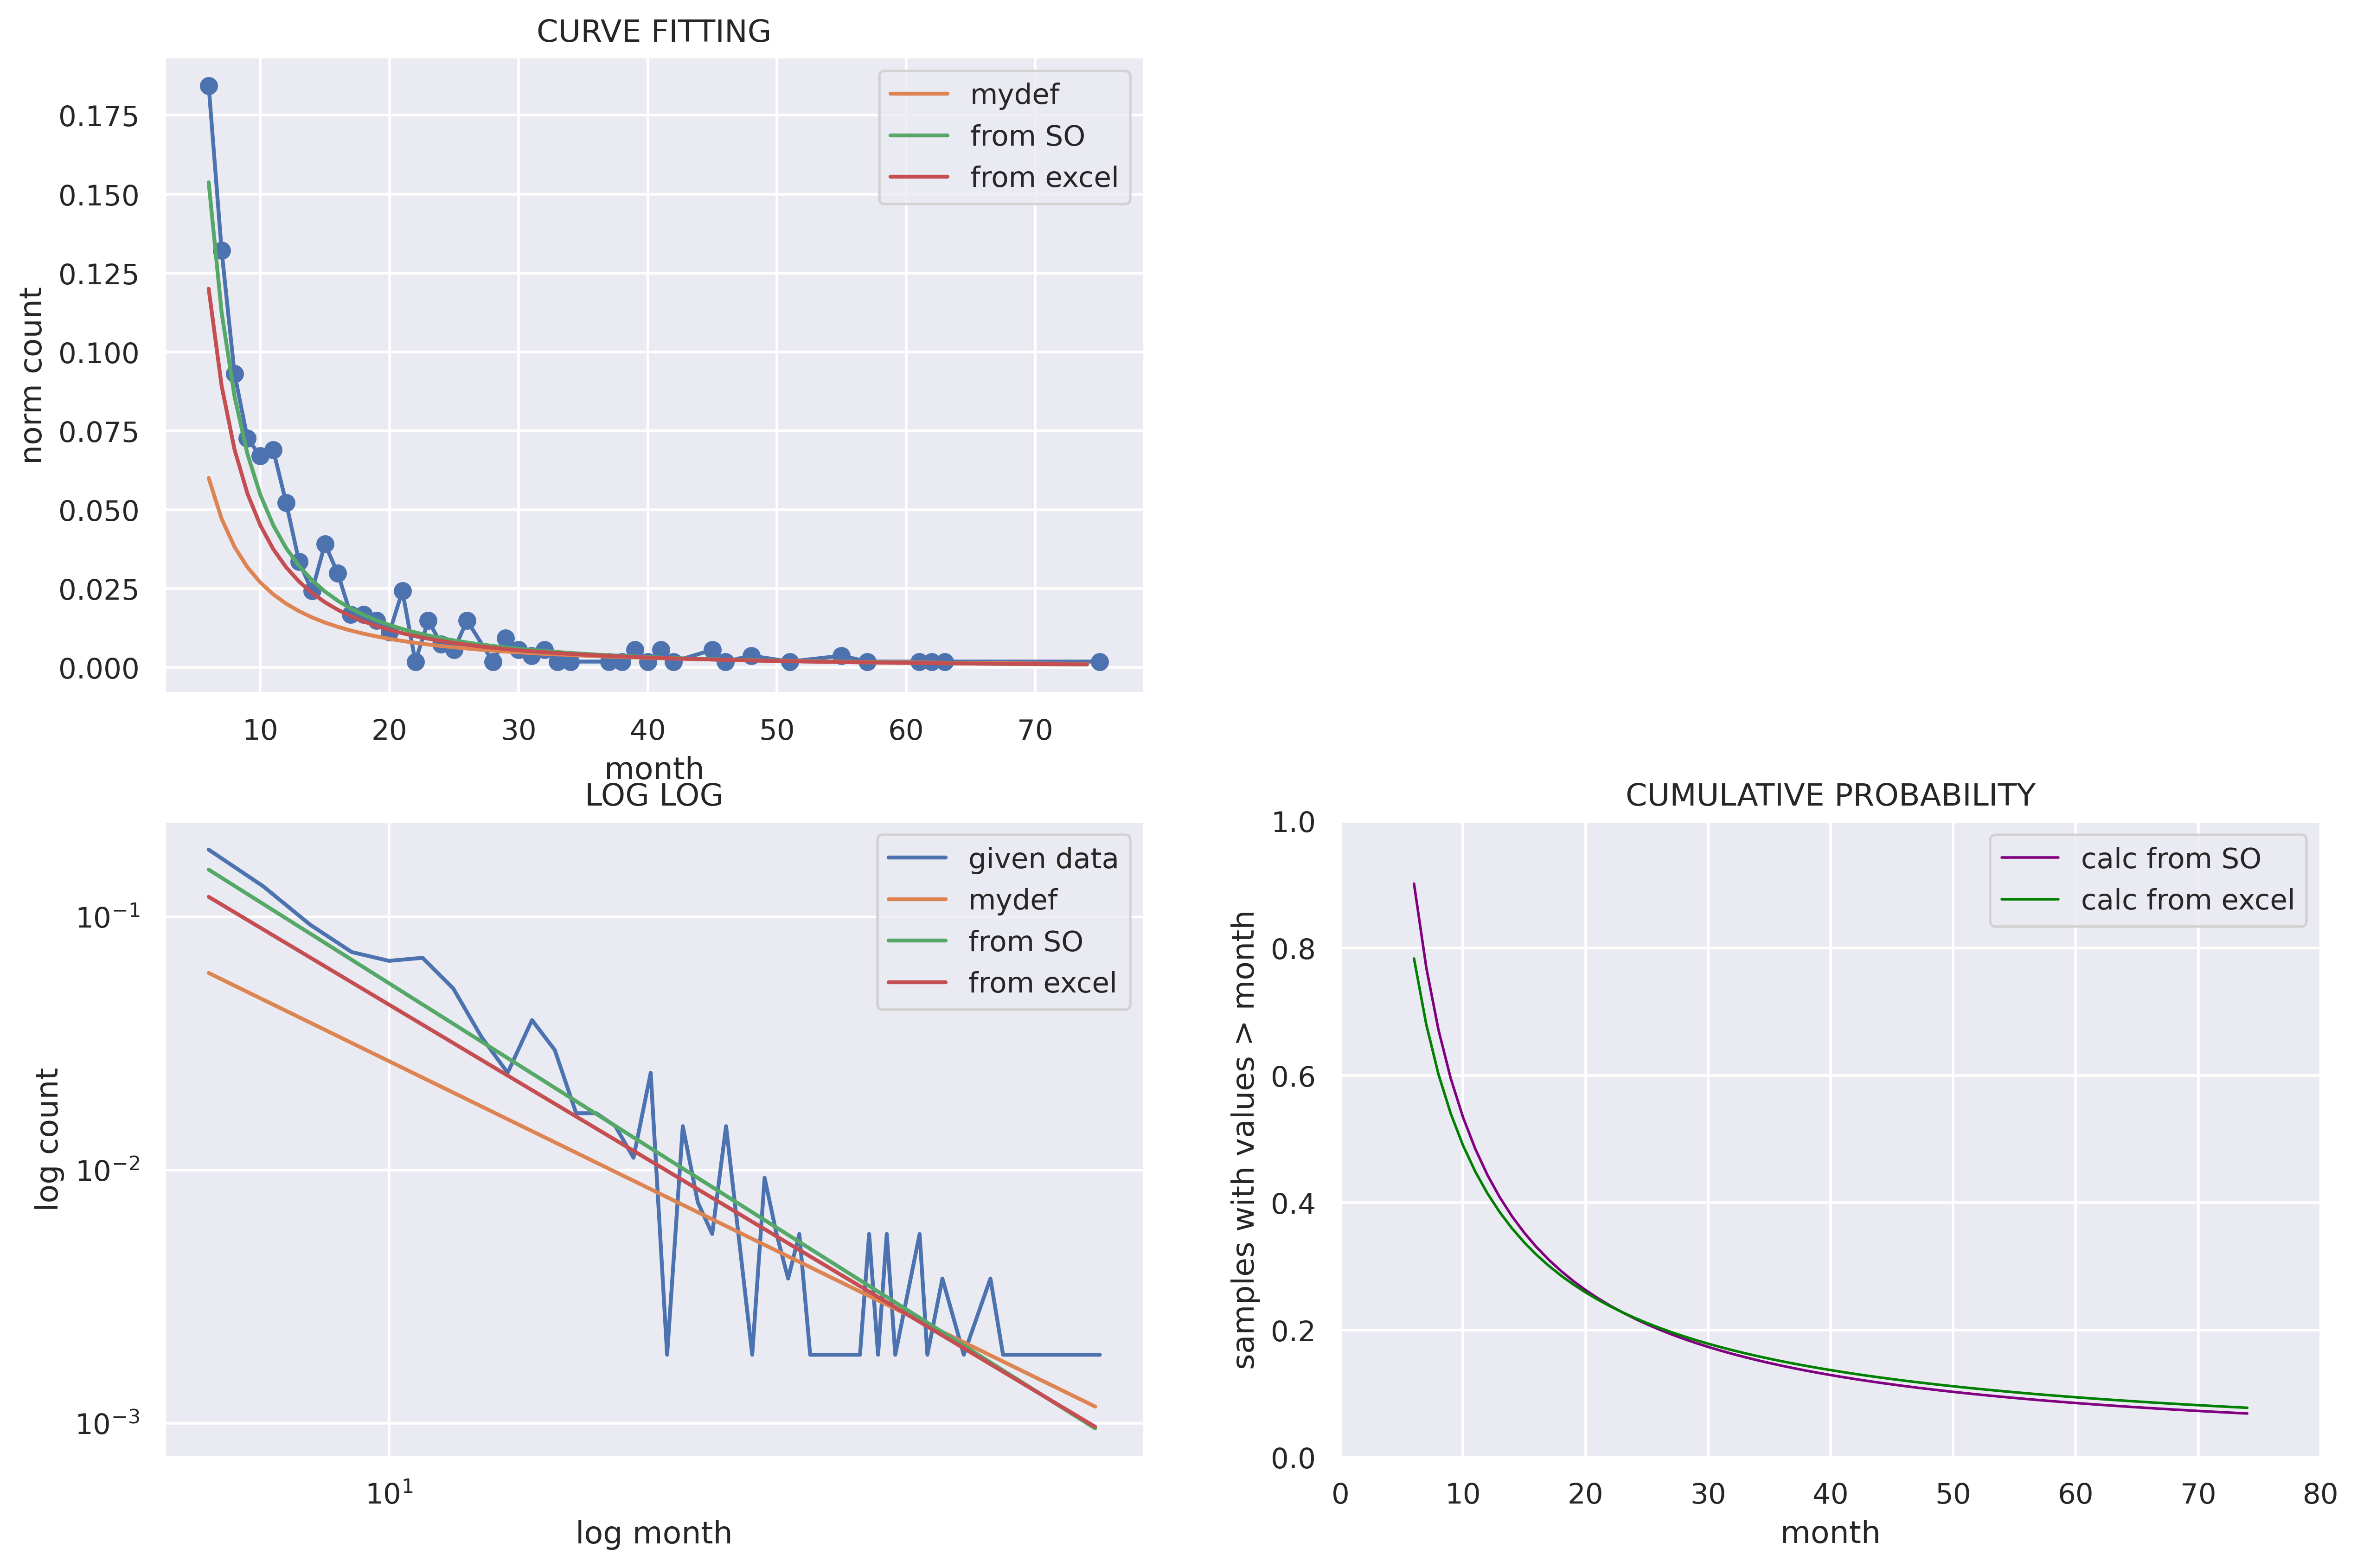

CPU times: user 1.9 s, sys: 66 ms, total: 1.97 s
Wall time: 2.1 s


In [41]:
%%time

fig = plt.figure(figsize=(15, 10), dpi=400)

plt.subplot(2, 2, 1)
plt.title('CURVE FITTING')
plt.plot(index_list, freq_list)
plt.scatter(index_list, freq_list)
plt.xlabel('month'); plt.ylabel('norm count')
plt.plot(nprange,y_neweq, label = 'mydef')
plt.plot(nprange,y_SO, label = 'from SO')
plt.plot(nprange,y_excel, label = 'from excel')
plt.legend()

# plt.subplot(2, 2, 2)

plt.subplot(2, 2, 3)
plt.title('LOG LOG')
plt.loglog(index_list, freq_list, label='given data')
plt.loglog(nprange,y_neweq, label = 'mydef')
plt.loglog(nprange,y_SO, label = 'from SO')
plt.loglog(nprange,y_excel, label = 'from excel')
plt.ylabel('log count'); plt.xlabel('log month')
plt.legend()

plt.subplot(2, 2, 4)
plt.title('CUMULATIVE PROBABILITY')
plt.plot(nprange, cprob_SO, c='purple', linewidth = 1, label='calc from SO')
plt.plot(nprange, cprob, c='green', linewidth = 1, label='calc from excel')
plt.ylabel('samples with values > month'); plt.xlabel('month')
plt.xlim(0,80); plt.ylim(0.0,1.0)
plt.legend()

plt.show()

In [77]:
data = data_df_output.intensity_max.values
# data = data_df_output.max_cell_area_all.values
# data = data_df_output.cumulative_intensity.values

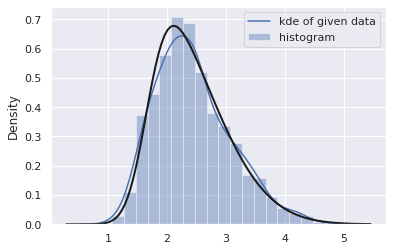

In [78]:
from scipy.stats import skewnorm

# # draw a histogram and kde of the given data
sns.distplot(data, kde_kws={'label':'kde of given data'}, label='histogram')

# # find parameters to fit a skewnorm to the data
ae, loce, scalee = skewnorm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax,100)
p = skewnorm.pdf(x,ae, loce, scalee) # do I really need this?
plt.plot(x, p, 'k', linewidth=2)
plt.legend()
plt.show()

In [119]:
def round_off_rating(number):
    return round(number * 4) / 4

In [120]:
rounded_list = []
for i in data:
    rounded_list.append(round_off_rating(i))

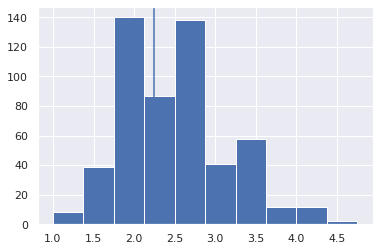

In [123]:
plt.hist(rounded_list)
plt.axvline(mode)

In [122]:
from statistics import mode
mode = mode(rounded_list)

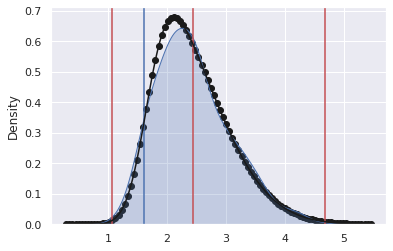

In [104]:
plt.axvline(np.nanmean(data), c='r')
plt.axvline(np.nanmin(data),c='r')
plt.axvline(np.nanmax(data),c='r')
plt.axvline(mode)


plt.plot(x, p, c='k')
plt.scatter(x, p, c='k')

sns.kdeplot(data,shade = True)
plt.show()

In [51]:
# from scipy.stats import poisson
# from scipy import stats

# ax = sns.distplot(data, bins=20, kde=False, fit=stats.poisson); ## poisson distribution

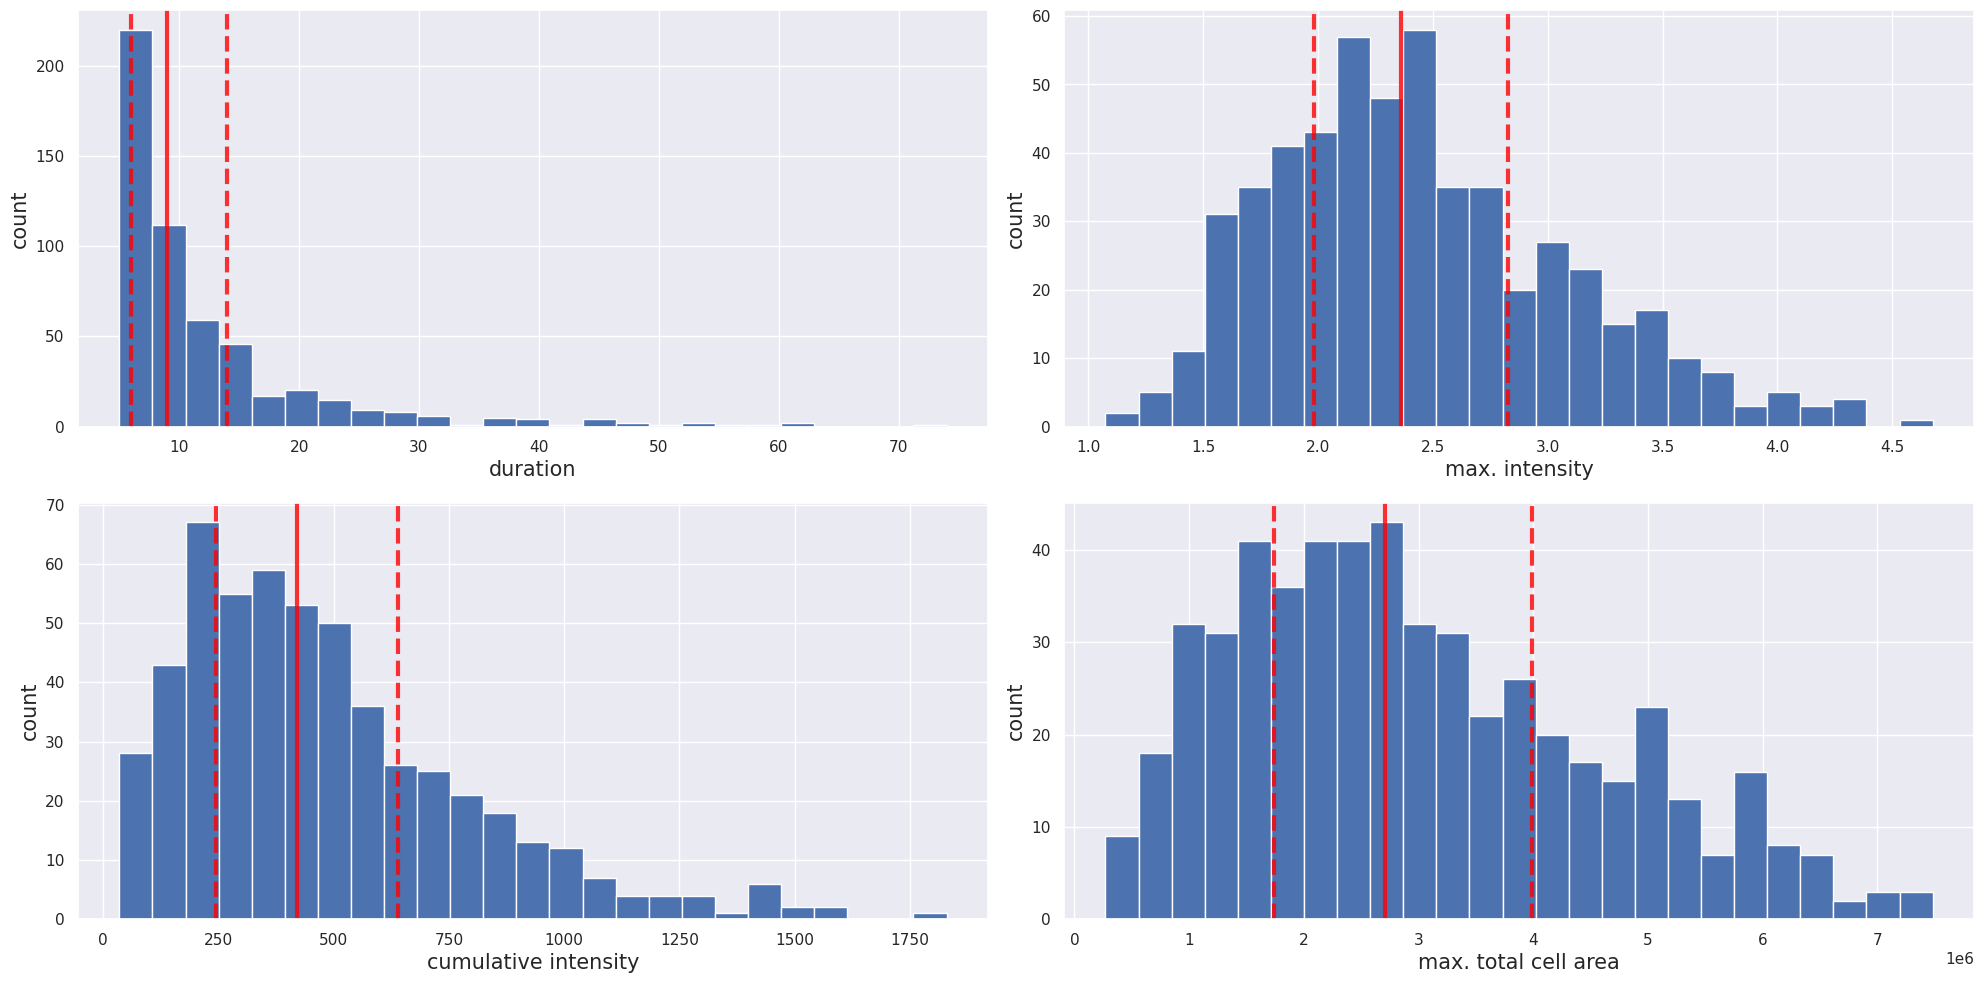

CPU times: user 819 ms, sys: 16.9 ms, total: 836 ms
Wall time: 901 ms


In [35]:
%%time
# histograms

fig = plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(2, 2, 1)
plt.hist(duration_all, bins =25)
plt.xlabel('duration', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(dur_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(dur_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(dur_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.subplot(2, 2, 2)
plt.hist(maximums_all, bins =25)
plt.xlabel('max. intensity', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(max_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(max_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(max_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.subplot(2, 2, 3)
plt.hist(cumulatives_all, bins =25)
plt.xlabel('cumulative intensity', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(ic_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(ic_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(ic_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.subplot(2, 2, 4)
plt.hist(max_cell_area_all, bins =25)
plt.xlabel('max. total cell area', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(mca_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(mca_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(mca_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.tight_layout()
plt.show()

# ask Noah / Jacob / Hillary

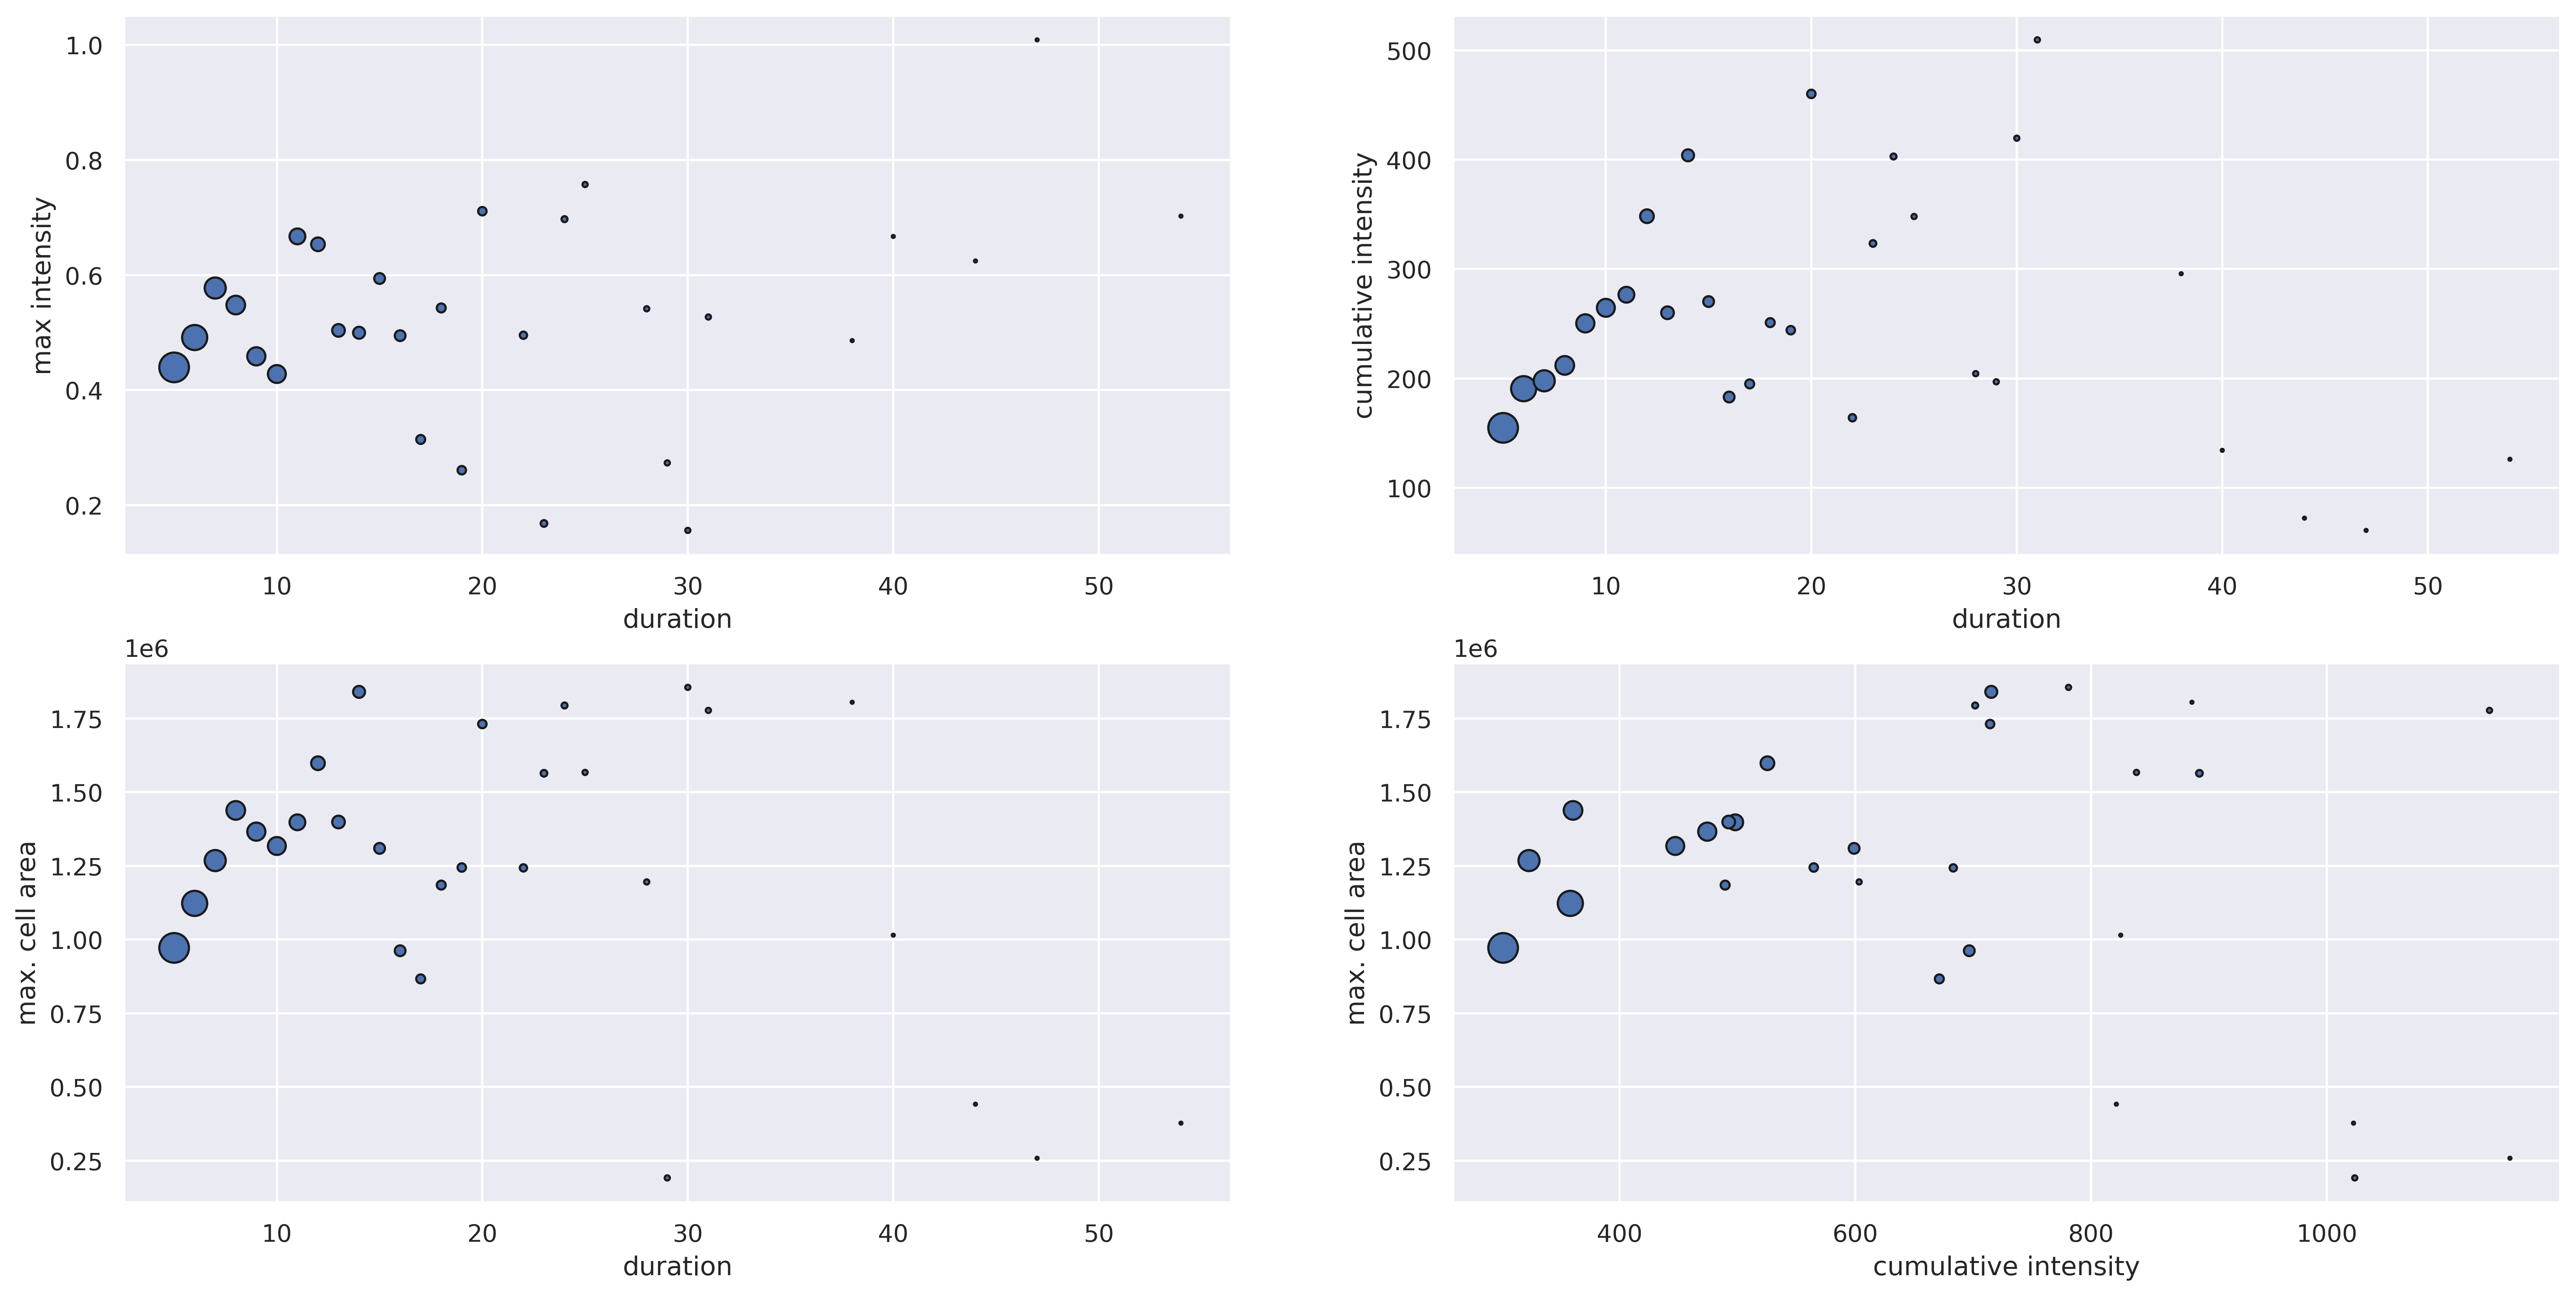

CPU times: user 1.4 s, sys: 60.8 ms, total: 1.46 s
Wall time: 1.55 s


In [107]:
%%time

fig = plt.figure(figsize=(20, 10), dpi=400)

plt.subplot(2, 2, 1)
plt.scatter(grouped_df_mean.index.values, grouped_df_std.intensity_max.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('max intensity')

plt.subplot(2, 2, 2)
plt.scatter(grouped_df_mean.index.values, grouped_df_std.cumulative_intensity.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('cumulative intensity')

plt.subplot(2, 2, 3)
plt.scatter(grouped_df_mean.index.values, grouped_df_std.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('max. cell area')

plt.subplot(2, 2, 4)
plt.scatter(grouped_df_mean.cumulative_intensity.values, grouped_df_std.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('cumulative intensity'); plt.ylabel('max. cell area')

plt.show()

<font color='yellow'> <b> TO DO LIST
* SST Anomaly --> cumulative distribution --> to see if it goes to one    
* IDEA: MHW --> controlled by ENSO
* Error bars for trendline

### Sanity check: Gantt chart

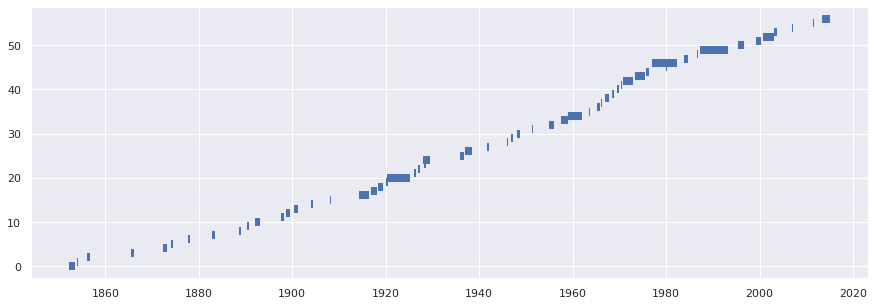

In [34]:
import matplotlib.dates as dt

i = 1
inde = np.arange(0,len(filt_full_xarrays[i].time_begin.values),1)
fig, ax = plt.subplots(figsize=(15, 5))
ax = ax.xaxis_date()
ax = plt.hlines(inde, filt_full_xarrays[i].time_begin.values, filt_full_xarrays[i].time_end.values,linewidth=8)

### Scratch work

In [ ]:
# normalized = NormalizeData(grouped_df_std.intensity_max.values)
# print(normalized)

In [ ]:
# fig = plt.figure(figsize=(20, 10), dpi=400)

# plt.subplot(2, 2, 1)
# # plt.scatter(grouped_df_mean.index.values, grouped_df_mean.intensity_max.values, s=freq_count_dur.values*1000, color='k', edgecolors='k',
# #            linewidths=grouped_df_std.intensity_max.values*10)
# plt.scatter(grouped_df_mean.index.values, grouped_df_mean.intensity_max.values, s=freq_count_dur.values*1000,c=)
# plt.xlabel('duration'); plt.ylabel('max intensity')

# plt.subplot(2, 2, 2)
# plt.scatter(grouped_df_mean.index.values, grouped_df_mean.cumulative_intensity.values, s=freq_count_dur.values*1000, edgecolors='k')
# plt.xlabel('duration'); plt.ylabel('cumulative intensity')

# plt.subplot(2, 2, 3)
# plt.scatter(grouped_df_mean.index.values, grouped_df_mean.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
# plt.xlabel('duration'); plt.ylabel('max. cell area')

# plt.subplot(2, 2, 4)
# plt.scatter(grouped_df_mean.cumulative_intensity.values, grouped_df_mean.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
# plt.xlabel('cumulative intensity'); plt.ylabel('max. cell area')

# plt.show()

In [ ]:
# y = C*np.asarray(index_list)**(-alpha)
# print(y)
# This gives C = 3.7367 and alpha = 1.919